In [15]:
"""Plotting parameters"""
from matplotlib import rcParams
#rcParams['axes.formatter.limits'] = (-7, 7)
rcParams['axes.formatter.limits'] = (-2,3)
rcParams['axes.labelsize'] = 22
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
rcParams['font.size'] = 22

In [6]:
"""Import packages"""
import datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as sio
%matplotlib inline

In [7]:
"""Get data"""

ds = xr.open_dataset('delaware_bay_docflux.nc')

Hvom = ds.Hvom
Hvom_DOC = ds.Hvom_DOC
DOC = ds.DOC
salt = ds.salt
temp = ds.temp

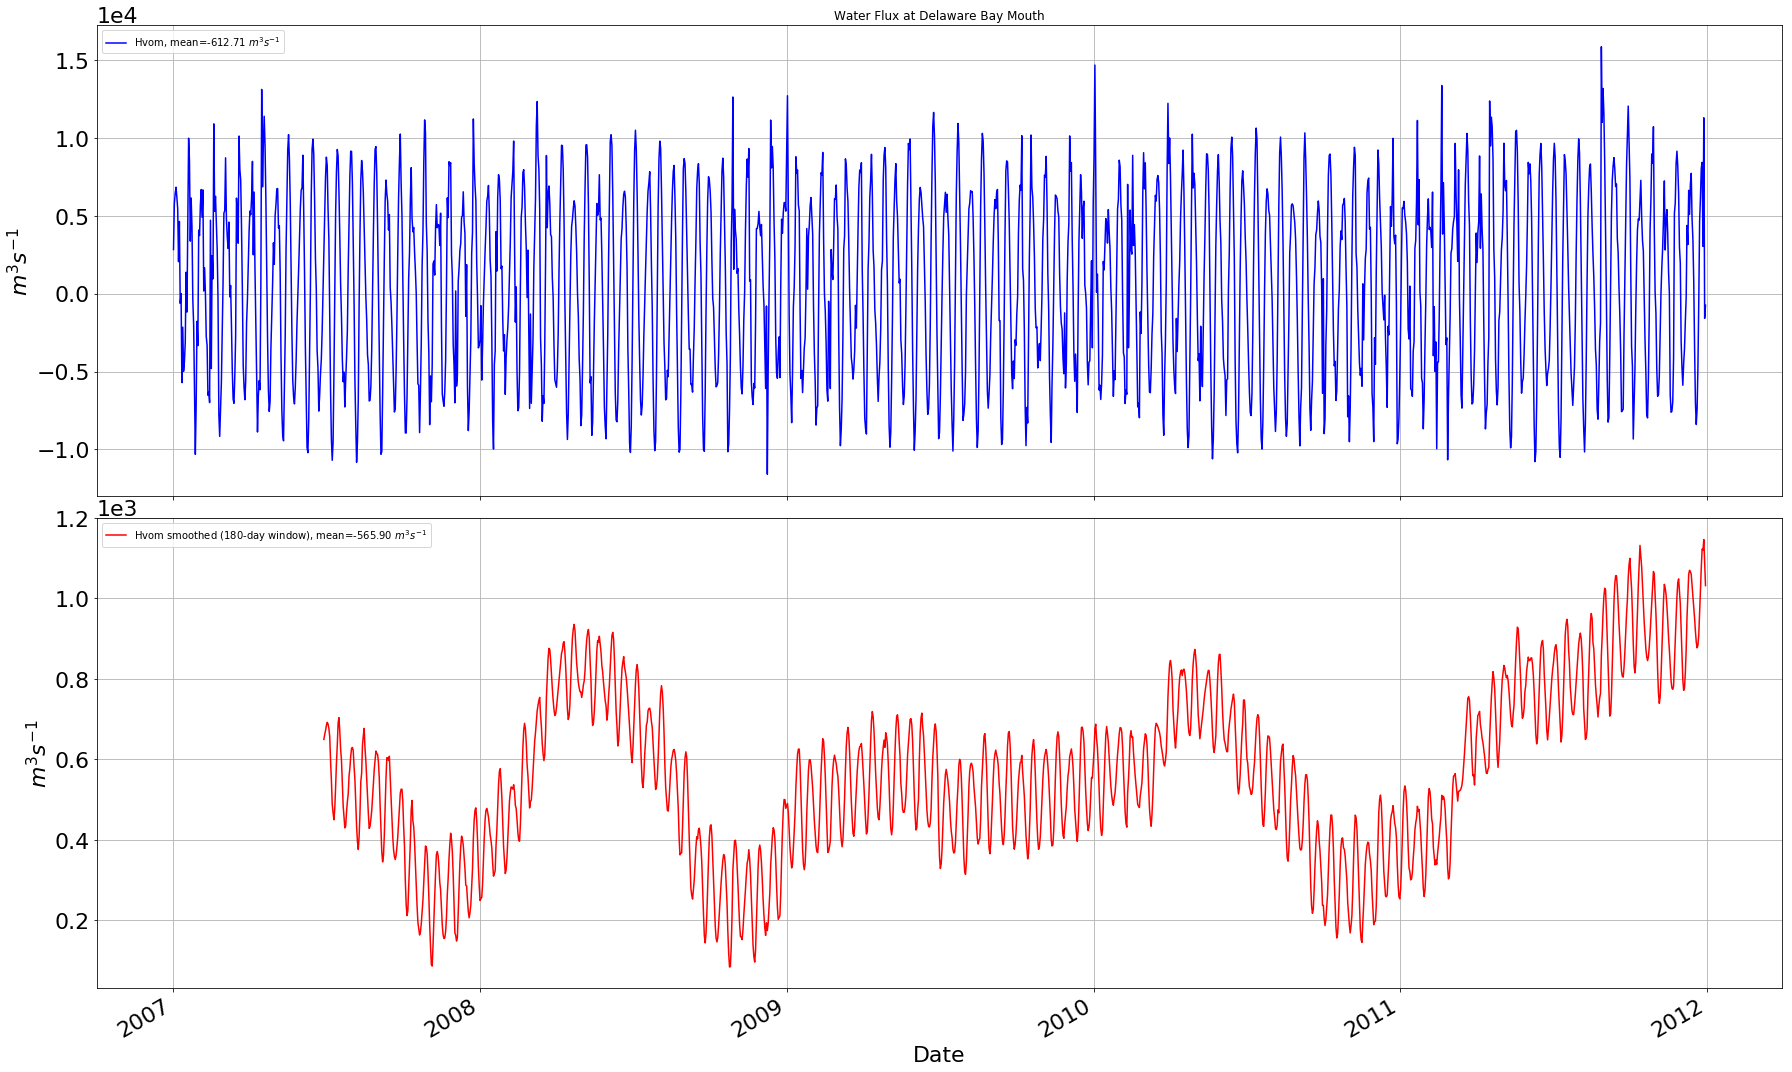

In [9]:
# sum over 2nd axis then sum over first axis
# Chenged Hvom sign - positive is now out
sum_Hvom = Hvom.sum(axis=2).sum(axis=1)

#rolling mean:
window = 180
sm=sum_Hvom.rolling(ocean_time=window).mean()

# to get the dimension names
Hvom.dims

# summing over dimensions
sum_Hvom2 = Hvom.sum(dim=['s_rho', 'xi_v'])

# plotting time series
# raw time series
#sum_Huon.plot.line(ax=ax);
# smoothed time series (10day rolling window)
#sm.plot.line(ax=ax, color='r')

f, ax = pl.subplots(nrows=2, sharex=True, figsize=(25, 15))
# Daily Hvom
yplt1 = -sum_Hvom.sel(ocean_time=slice('2007','2011'))
yplt1.plot.line( 'b-', label=f'Hvom, mean={float(sum_Hvom.mean()): .2f}' + \
        ' $m^3 s^{-1}$', ax=ax[0])
ax[0].set_ylabel('$m^3 s^{-1}$')
ax[0].legend()
ax[0].set_title('Water Flux at Delaware Bay Mouth')
ax[0].grid()
# smoothed Hvom
yplt2 = -sm.sel(ocean_time=slice('2007','2011'))
yplt2.plot.line('r-', label=f'Hvom smoothed ({window}-day window), \
mean={float(sm.mean()): .2f}' + ' $m^3 s^{-1}$', ax=ax[1])
ax[1].set_ylabel('$m^3 s^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend();
ax[1].grid()
f.tight_layout(h_pad=0.01)

# assert equality of two data arrays
xr.testing.assert_equal(sum_Hvom,sum_Hvom2)

f.savefig('Figures/Hvom_DBM.png',dpi=300)

In [10]:
"""Get the mean Huon in m3/s - negative is seaward"""
np.mean(sum_Hvom)

<xarray.DataArray 'Hvom' ()>
array(-612.7138992443045)

In [11]:
sum_Hvom_DOC = Hvom_DOC.sum(dim=['s_rho', 'xi_v'])
"""m3/s x mmol-C/m3 to Tg-C/yr"""
sum_Hvom_DOC = sum_Hvom_DOC*12*1e-3*86400*365*1e-12

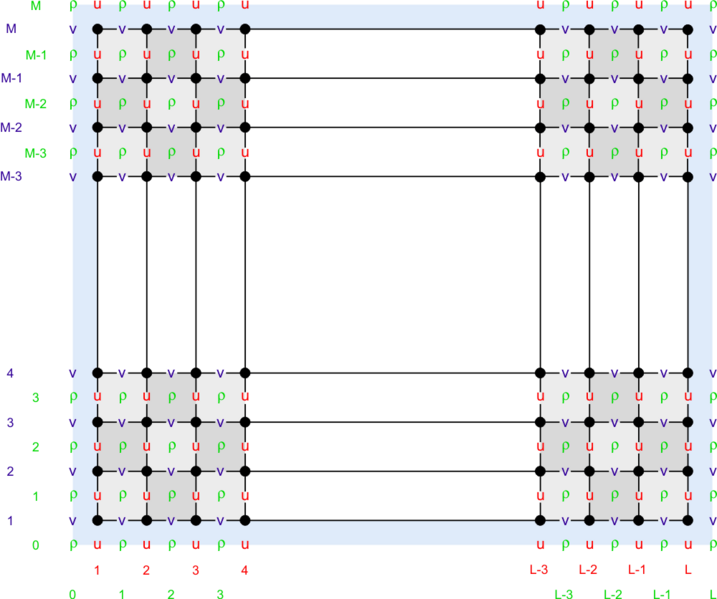

In [12]:
# Horizontal discretization of grid cells - significant for Hvom*DOC calculation 
from IPython.display import Image
Image(filename='../Figures/717px-staggered_grid_rho_cells.png')

In [13]:
# compute Hvom*DOC
HvomDOC=np.multiply(Hvom, DOC)
sum_HvomDOC = HvomDOC.sum(dim=['s_rho', 'xi_v'])
"""m3/s x mmol-C/m3 to Tg-C/yr"""
sum_HvomDOC = sum_HvomDOC*12*1e-3*86400*365*1e-12
# apply rolling filter
sm_HvomDOC=sum_HvomDOC.rolling(ocean_time=window).mean()

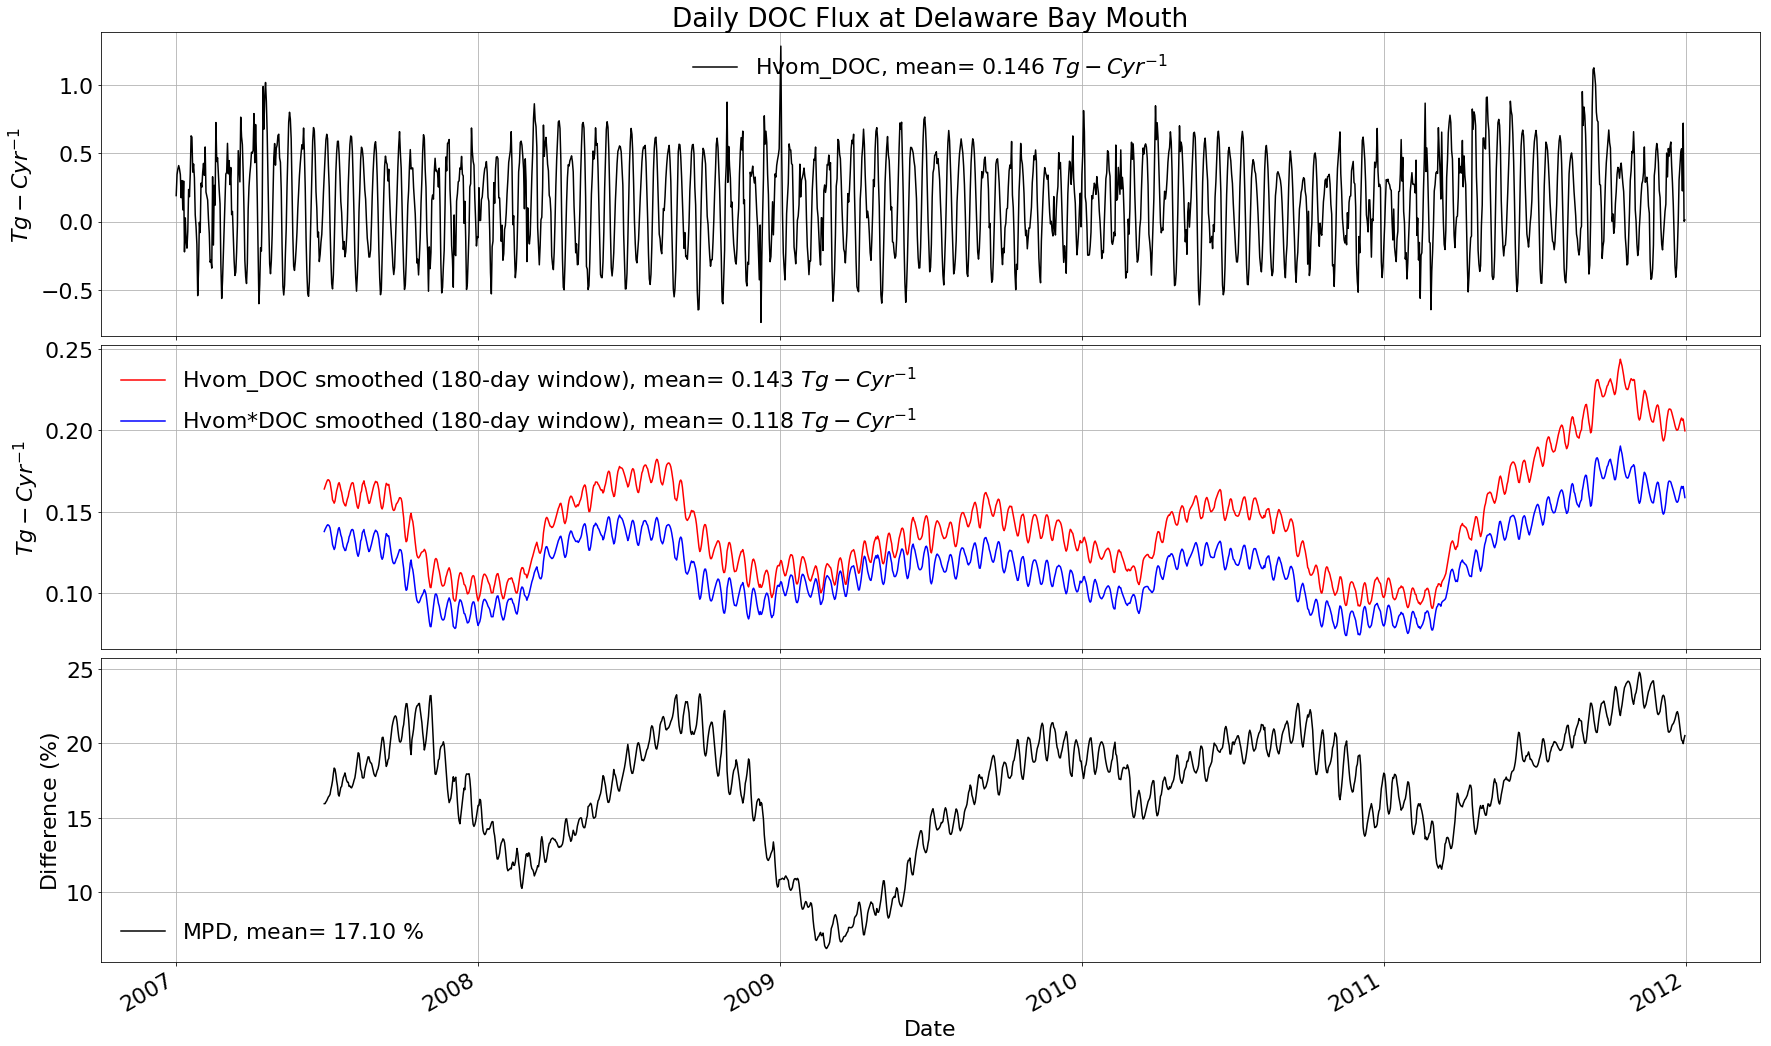

In [16]:
# plotting time series of DOC flux calculated using the two different methods
sm=sum_Hvom_DOC.rolling(ocean_time=window).mean()
# mean percent difference between the two methods
MPD = 100*(sm - sm_HvomDOC)/sm
#MPD = MPD.mean(dim=['ocean_time'])
f, ax = pl.subplots(nrows=3, sharex=True, figsize=(25, 15))
# Daily DOC Flux
yplot1 = -sum_Hvom_DOC.sel(ocean_time=slice('2007','2011'))
yplot1.plot.line( 'k-',
    label=f'Hvom_DOC, mean={float(yplot1.mean()): .3f}' + ' $Tg-C yr^{-1}$', ax=ax[0])
ax[0].set_ylabel('$Tg-C yr^{-1}$')
ax[0].legend(frameon=False)
ax[0].set_title('Daily DOC Flux at Delaware Bay Mouth')
ax[0].grid()
# DOC flux smoothed with rolling mean filter
yplot2 = -sm.sel(ocean_time=slice('2007','2011'))
yplot2.plot.line('r-',
    label=f'Hvom_DOC smoothed ({window}-day window), mean={float(yplot2.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].legend(frameon=False);
yplot3 = -sm_HvomDOC.sel(ocean_time=slice('2007','2011'))
yplot3.plot.line('b-',
    label=f'Hvom*DOC smoothed ({window}-day window), mean={float(yplot3.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].legend(frameon=False)
ax[1].grid()
# MPD
yplot4 = MPD.sel(ocean_time=slice('2007','2011'))
yplot4.plot.line('k-',
    label=f'MPD, mean={float(MPD.mean()): .2f}' + ' $\%$', ax=ax[2])
ax[2].set_ylabel('Difference ($\%$)')
ax[2].set_xlabel('Date')
ax[2].legend(frameon=False)
ax[2].grid()
# Export figure
f.tight_layout(h_pad=0.01)
f.savefig('Figures/Hvom_DOCflux_DBM.png',dpi=300)

In [17]:
mean_DOC = DOC.mean(dim=['s_rho', 'xi_rho'])

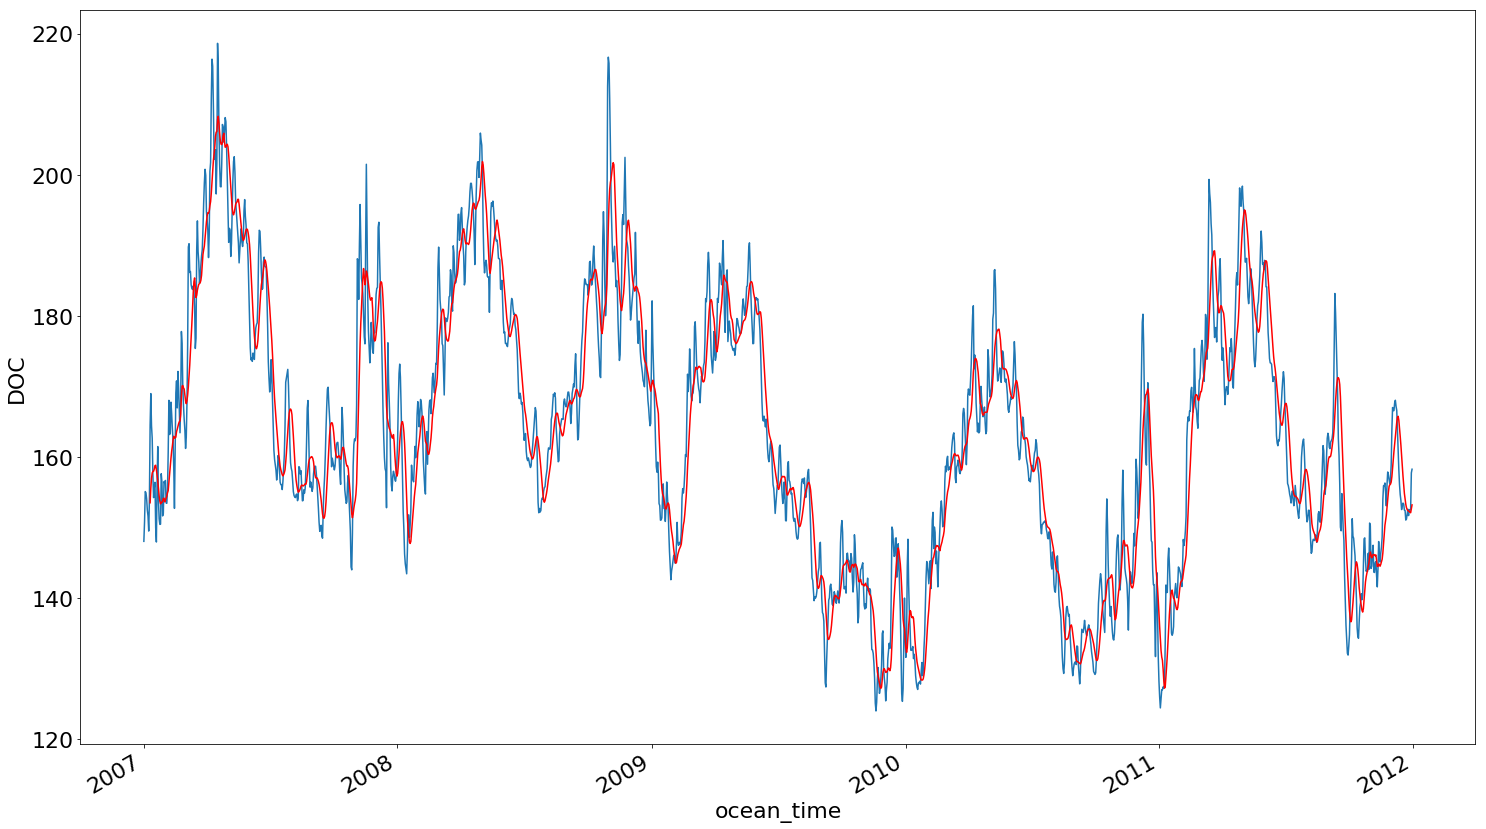

In [19]:
# plotting time series
f, ax=pl.subplots(figsize=(25, 15))
# raw time series
mean_DOC.plot.line(ax=ax);
#rolling mean:
sm=mean_DOC.rolling(ocean_time=10).mean()
# smoothed time series (10day rolling window)
sm.plot.line(ax=ax, color='r')

In [22]:
# get 8-day time averages for all data arrays
ds8D = ds[['Hvom', 'DOC', 'salt', 'temp']].resample(ocean_time='8D').mean('ocean_time')
Hvom8D = ds8D.Hvom
DOC8D = ds8D.DOC
salt8D = ds8D.salt
temp8D = ds8D.temp
# get Hvom8D*DOC8D
Hvom8DxDOC8D = np.multiply(Hvom8D, DOC8D)
DOCflux8D = Hvom8DxDOC8D.sum(dim=['s_rho', 'xi_v'])
# m3/s x mmol-C/m3 to Tg-C/yr
DOCflux8D = DOCflux8D*12*1e-3*86400*365*1e-12

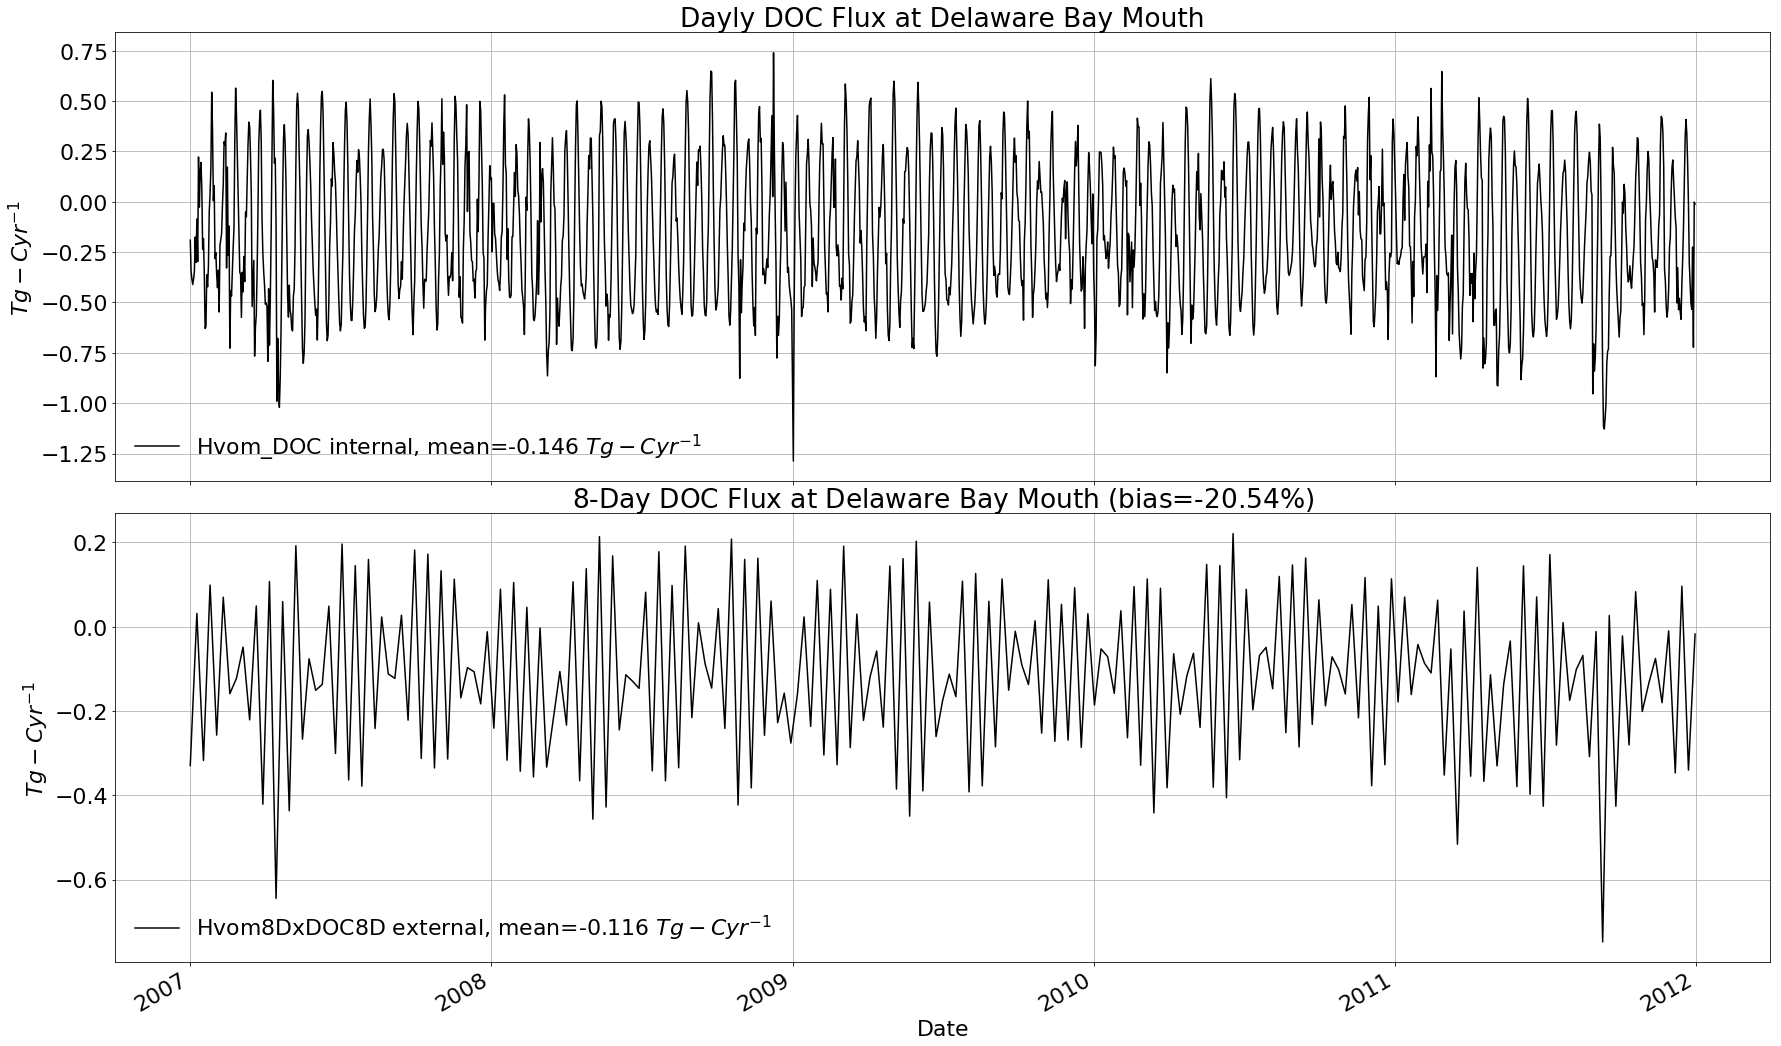

In [23]:
# plot daily internal DOC flux vs external 8-day DOC flux
f, ax = pl.subplots(nrows=2, sharex=True, figsize=(25, 15))
# Daily Hvom_DOC
yplot1 = sum_Hvom_DOC.sel(ocean_time=slice('2007','2011'))
yplot1.plot.line( 'k-',
    label=f'Hvom_DOC internal, mean={float(yplot1.mean()): .3f}' + ' $Tg-C yr^{-1}$', ax=ax[0])
ax[0].set_ylabel('$Tg-C yr^{-1}$')
ax[0].legend(frameon=False)
ax[0].set_title('Dayly DOC Flux at Delaware Bay Mouth')
ax[0].grid()
# Hom8D*DOC8D 
yplot2 = DOCflux8D.sel(ocean_time=slice('2007','2011'))
yplot2.plot.line('k-',
    label=f'Hvom8DxDOC8D external, mean={float(yplot2.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].legend(frameon=False);
#ax[1].set_ylim([0,0.6])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend(frameon=False);
# percent difference
mn1d = yplot1.mean()
mn8d = yplot2.mean()
pcdf = 100*(mn8d - mn1d)/mn1d
ax[1].set_title(f'8-Day DOC Flux at Delaware Bay Mouth (bias={float(pcdf): .2f}' + '$\%$)')
ax[1].grid()
f.tight_layout(h_pad=0.01)
f.savefig('Figures/Huon8DxDOC8Dflux_DBM.png',dpi=300)
